In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [5]:
df["sex"].nunique()

2

In [6]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [7]:
cat_cols= [col for col in df.columns if str(df[col].dtypes) in ["category", "bool", "object"]]

In [14]:
num_but_cat= [col for col in df.columns if df[col].nunique()<10 and df[col].dtypes in ["int", "float"]]

In [15]:
cat_but_car=[col for col in df.columns if df[col].nunique()>20 and str(df[col].dtypes) in ["category", "object"]]

In [16]:
cat_but_car

[]

In [17]:
cat_cols=[col for col in cat_cols if col not in cat_but_car]

In [18]:
cat_cols= cat_cols + num_but_cat

In [19]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [20]:
df[cat_cols]

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,S,Second,man,True,NaN,Southampton,no,True
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [22]:
df[cat_cols].nunique()

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
dtype: int64

In [23]:
100 * df["survived"].value_counts() / len(df)

0    61.616162
1    38.383838
Name: survived, dtype: float64

In [36]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100* dataframe[col_name].value_counts() /len(dataframe)}))
    print("###########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block= True)

In [37]:
cat_summary(df, "sex")

        sex      Ratio
male    577  64.758698
female  314  35.241302
###########################################


In [38]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
male    577  64.758698
female  314  35.241302
###########################################
   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
###########################################
        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
###########################################
       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
###########################################
       adult_male     Ratio
True          537  60.26936
False         354  39.73064
###########################################
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
###########################################
             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
###############

        sex      Ratio
male    577  64.758698
female  314  35.241302
###########################################


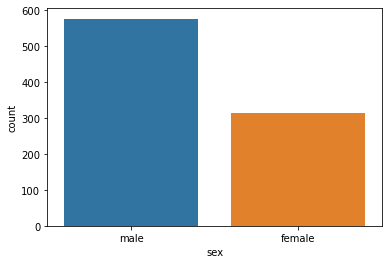

In [39]:
cat_summary(df, "sex", plot= True)

        sex      Ratio
male    577  64.758698
female  314  35.241302
###########################################


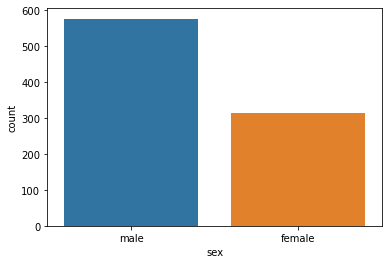

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
###########################################


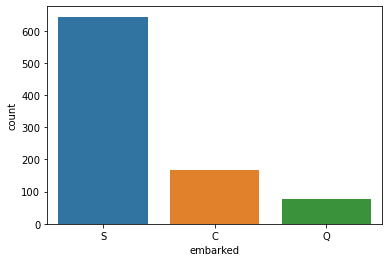

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
###########################################


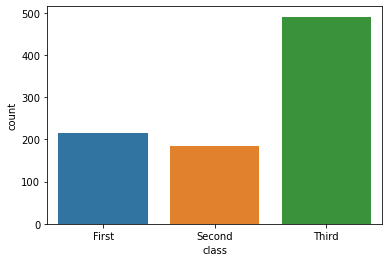

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
###########################################


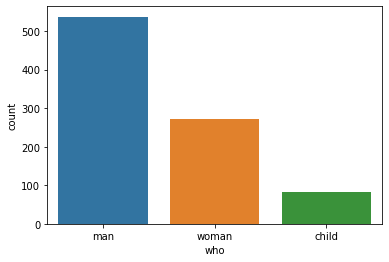

hata almamak icin fonksiyon calistirilmiyor cunku veri tipi bool 
   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
###########################################


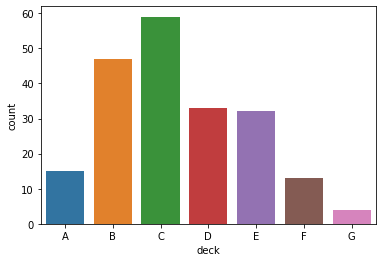

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
###########################################


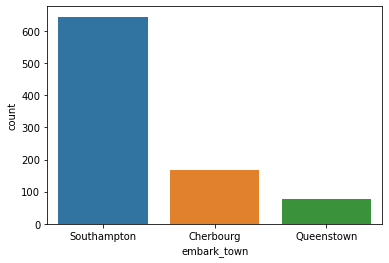

     alive      Ratio
no     549  61.616162
yes    342  38.383838
###########################################


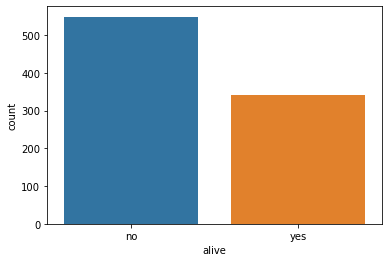

hata almamak icin fonksiyon calistirilmiyor cunku veri tipi bool 


In [41]:
for col in cat_cols:
    if df[col].dtypes =="bool":   #bool veri tipine geldiginde hata veriyor 
        print("hata almamak icin fonksiyon calistirilmiyor cunku veri tipi bool ")
    else:
        cat_summary(df, col, plot=True) 

In [43]:
# ornek olarak hata aldigim bool deger adult_male
df["adult_male"].astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: adult_male, Length: 891, dtype: int32

        sex      Ratio
male    577  64.758698
female  314  35.241302
###########################################


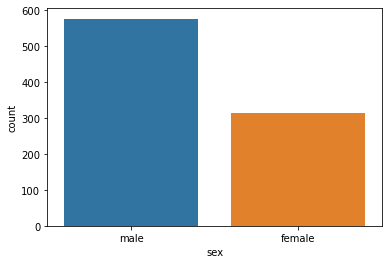

   embarked      Ratio
S       644  72.278339
C       168  18.855219
Q        77   8.641975
###########################################


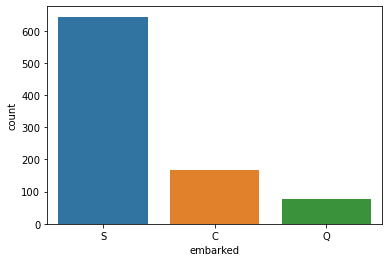

        class      Ratio
Third     491  55.106622
First     216  24.242424
Second    184  20.650954
###########################################


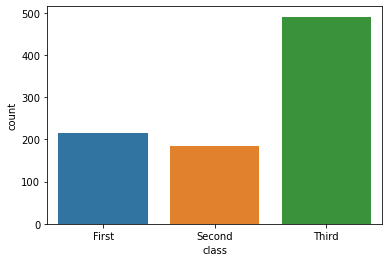

       who      Ratio
man    537  60.269360
woman  271  30.415264
child   83   9.315376
###########################################


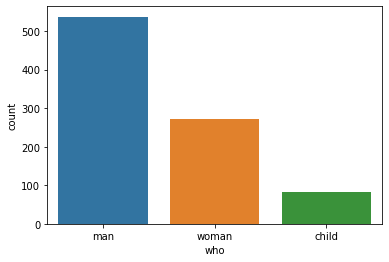

   adult_male     Ratio
1         537  60.26936
0         354  39.73064
###########################################


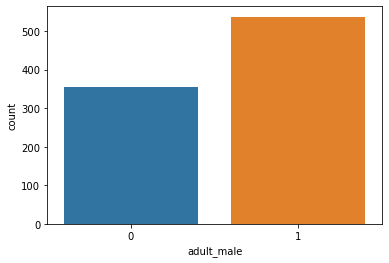

   deck     Ratio
C    59  6.621773
B    47  5.274972
D    33  3.703704
E    32  3.591470
A    15  1.683502
F    13  1.459035
G     4  0.448934
###########################################


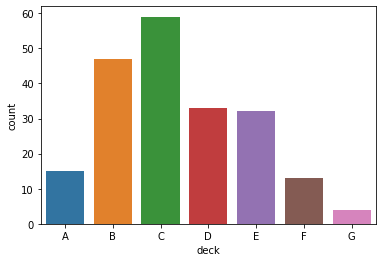

             embark_town      Ratio
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975
###########################################


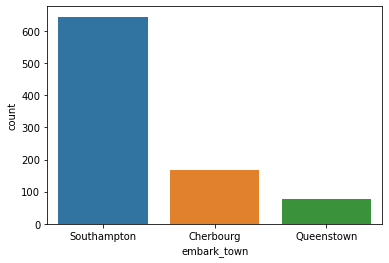

     alive      Ratio
no     549  61.616162
yes    342  38.383838
###########################################


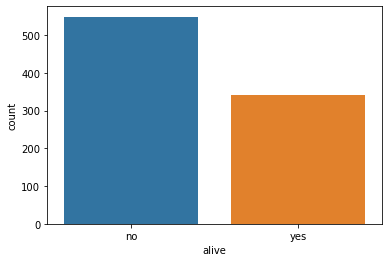

   alone     Ratio
1    537  60.26936
0    354  39.73064
###########################################


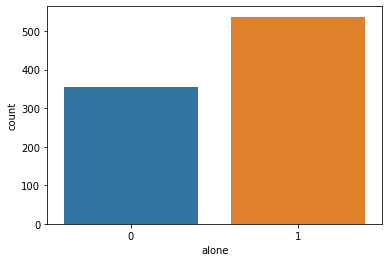

In [44]:
#fonksiyonu su sekilde yazarsak bool dahil tum veri tiplerinde calisir.
for col in cat_cols:
    if df[col].dtypes =="bool":   
        df[col]=df[col].astype(int)
        cat_summary(df, col, plot=True) 
    else:
        cat_summary(df, col, plot=True) 


In [45]:
df[["age", "fare"]].describe().T

,count,mean,std,min,25%,50%,75%,max
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [46]:
num_cols= [col for col in df.columns if col not in cat_cols]


In [48]:
def num_summary(dataframe, numerical_col):
    quantiles=[0.05, 0.10, 0.20, 0.30 , 0.40 ,0.50 , 0.60 ,0.70, 0.80, 0.90]
    print(dataframe[numerical_col].describe(quantiles).T)

In [49]:
for col in num_cols:
    num_summary(df,col)

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        1.000000
80%        1.000000
90%        1.000000
max        1.000000
Name: survived, dtype: float64
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
5%         1.000000
10%        1.000000
20%        1.000000
30%        2.000000
40%        2.000000
50%        3.000000
60%        3.000000
70%        3.000000
80%        3.000000
90%        3.000000
max        3.000000
Name: pclass, dtype: float64
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64
count    891.0

In [50]:
def num_summary(dataframe, numerical_col, plot= False):
    quantiles=[0.05, 0.10, 0.20, 0.30 , 0.40 ,0.50 , 0.60 ,0.70, 0.80, 0.90]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        1.000000
80%        1.000000
90%        1.000000
max        1.000000
Name: survived, dtype: float64


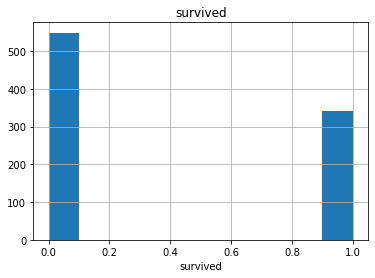

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
5%         1.000000
10%        1.000000
20%        1.000000
30%        2.000000
40%        2.000000
50%        3.000000
60%        3.000000
70%        3.000000
80%        3.000000
90%        3.000000
max        3.000000
Name: pclass, dtype: float64


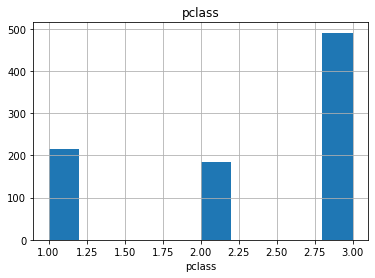

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64


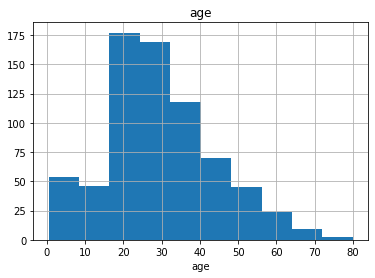

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        1.000000
80%        1.000000
90%        1.000000
max        8.000000
Name: sibsp, dtype: float64


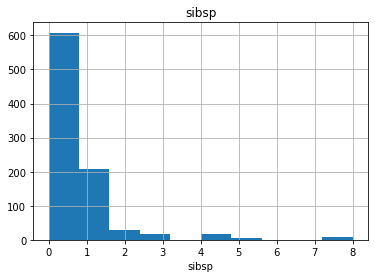

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%        1.000000
90%        2.000000
max        6.000000
Name: parch, dtype: float64


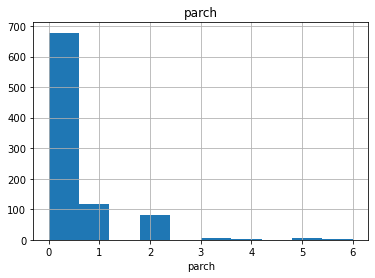

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
max      512.329200
Name: fare, dtype: float64


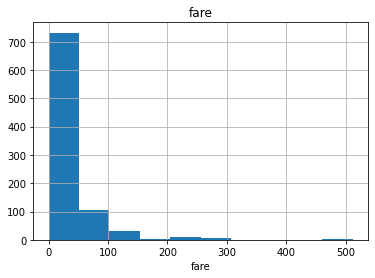

In [51]:
for col in num_cols:
    num_summary(df,col, plot=True)